In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


### Load data

#### Load language pairs with scores

In [3]:
pair_scores = pd.read_csv("lang_pair_scores.csv")

In [4]:
pair_scores.head()

,train_lang,test_lang,acc,f1
0,af,af,0.984390,0.982330
1,af,ar,0.587932,0.517718
2,af,bg,0.847598,0.834094
3,af,de,0.837953,0.828865
4,af,el,0.800967,0.779682


Consider two languages L1 and L2. The difference in performance between training on L1 and testing on L2 can be sometimes enormous compared to training on L2 and testing on L1, even for supposedly similar languages. <br>
Create a table with those differences. The current code produces a table with duplicates, this does not have an impact on the mean/median and is useful in later cells. If you want to create a table without duplicates, replace the line `if lang1 != lang2:` with `if pos_langs.index(lang1)<pos_langs.index(lang2):`.

In [5]:
pos_langs = list(pair_scores.train_lang.unique())
pair_diff = {'lang1':[], 'lang2':[], 'diff':[]}
pairs_used = set()
for lang1 in pos_langs:
    for lang2 in pos_langs:
        if lang1!=lang2:
            lang1_lang2 = pair_scores[(pair_scores.train_lang==lang1)&(pair_scores.test_lang==lang2)].iat[0,2] # accuracy
            lang2_lang1 = pair_scores[(pair_scores.train_lang==lang2)&(pair_scores.test_lang==lang1)].iat[0,2] # accuracy
            diff = np.abs(lang1_lang2-lang2_lang1)
#             print("Lang 1: {} Lang 2: {} Acc 1: {} Acc 2: {} Diff: {}".format(lang1, lang2, lang1_lang2, lang2_lang1, diff))
            pair_diff['lang1'].append(lang1)
            pair_diff['lang2'].append(lang2)
            pair_diff['diff'].append(diff)

pair_diff = pd.DataFrame.from_dict(pair_diff)
pair_diff.head()

,lang1,lang2,diff
0,af,ar,0.125064
1,af,bg,0.010660
2,af,de,0.027009
3,af,el,0.044059
4,af,en,0.023589


On average, the difference in accuracy between L1 -> L2 and L2 -> L1 is 12%

In [6]:
pair_diff['diff'].median(),pair_diff['diff'].mean()

(0.07613998567766528, 0.1204341103754802)

In [7]:
pair_diff.shape

(812, 3)

See pairs with the largest distance.

In [8]:
pair_diff.sort_values(by='diff', ascending=False)

,lang1,lang2,diff
88,de,en,0.562047
143,en,de,0.562047
559,mr,zh,0.536951
803,zh,mr,0.536951
494,ja,mr,0.503587
549,mr,ja,0.503587
683,te,fr,0.456369
331,fr,te,0.456369
326,fr,mr,0.455553
543,mr,fr,0.455553


See languages with the largest average difference. French is surprisngly high - 30%. The next european language is English - 10%.

In [9]:
pair_diff.groupby(by='lang1').mean()['diff'].sort_values(ascending=False)

lang1
fr    0.309028
mr    0.280618
te    0.226290
ja    0.214950
zh    0.211061
ta    0.150446
fi    0.118401
ur    0.113590
en    0.108233
hu    0.107268
de    0.104224
es    0.102966
tr    0.099605
et    0.098876
pt    0.097891
af    0.094944
it    0.094032
el    0.088340
ru    0.088339
fa    0.086008
eu    0.085931
bg    0.085582
id    0.083558
hi    0.082704
ar    0.081138
vi    0.074753
nl    0.073671
he    0.072818
ko    0.057324
Name: diff, dtype: float64

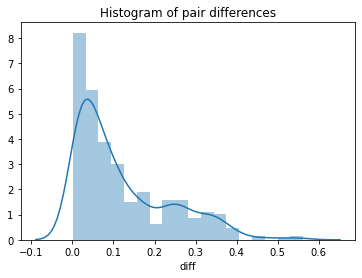

In [10]:
sns.distplot(pair_diff['diff'])
plt.title("Histogram of pair differences")
plt.show()

Average train language performance

In [11]:
pair_scores.groupby(by='train_lang').mean()['acc'].sort_values()

train_lang
mr    0.524058
ja    0.541507
vi    0.570292
ta    0.587708
ko    0.600011
te    0.601922
zh    0.602740
ar    0.634491
tr    0.672977
eu    0.680329
fi    0.698031
hu    0.703418
fa    0.704405
id    0.706610
de    0.726708
ur    0.727452
hi    0.728506
af    0.732910
el    0.736454
he    0.744156
et    0.744542
bg    0.749244
ru    0.757012
pt    0.760581
es    0.763204
fr    0.773285
en    0.779038
nl    0.780569
it    0.783872
Name: acc, dtype: float64

Average test language performance

In [12]:
pair_scores.groupby(by='test_lang').mean()['acc'].sort_values()

test_lang
ja    0.333969
zh    0.406605
fr    0.482403
vi    0.582275
ko    0.600818
ar    0.619470
ur    0.656227
fa    0.682402
hi    0.692095
ta    0.713051
el    0.718669
eu    0.722913
hu    0.725092
he    0.728891
en    0.731077
id    0.734169
de    0.734745
es    0.735063
it    0.736671
af    0.741480
tr    0.746813
pt    0.748553
nl    0.757555
bg    0.778394
fi    0.784467
mr    0.795000
ru    0.801422
et    0.806021
te    0.819721
Name: acc, dtype: float64

In [13]:
def check_transfer(x):
    return x[x.train_lang==x.test_lang]['acc'].values[0]-x.mean()['acc']
pair_scores.groupby(by='train_lang').apply(check_transfer).sort_values()

train_lang
fr   -0.071485
en    0.187449
it    0.191790
nl    0.198723
es    0.213552
pt    0.217530
ur    0.221523
ru    0.227591
he    0.228206
id    0.229007
et    0.234531
bg    0.241495
el    0.242340
af    0.251479
hi    0.252583
de    0.253297
fi    0.259302
ta    0.260831
hu    0.267593
fa    0.280235
eu    0.284021
tr    0.287032
mr    0.315942
ar    0.331914
te    0.339166
ko    0.340879
vi    0.354669
zh    0.363737
ja    0.438540
dtype: float64

In [14]:
pair_scores.groupby(by='test_lang').apply(check_transfer).sort_values()

test_lang
mr    0.045000
te    0.121367
ta    0.135488
fi    0.172866
et    0.173052
ru    0.183181
id    0.201447
bg    0.212345
tr    0.213196
fr    0.219397
nl    0.221737
pt    0.229558
en    0.235410
it    0.238990
eu    0.241437
es    0.241693
af    0.242910
he    0.243471
de    0.245260
hu    0.245918
el    0.260126
hi    0.288993
ur    0.292748
fa    0.302238
ko    0.340072
vi    0.342686
ar    0.346935
zh    0.559872
ja    0.646078
dtype: float64

In [15]:
pair_scores[pair_scores.train_lang==pair_scores.test_lang].sort_values(by='acc',ascending=False)

,train_lang,test_lang,acc,f1
60,bg,bg,0.990739,0.989414
270,fa,fa,0.984640,0.976164
660,ru,ru,0.984603,0.982292
0,af,af,0.984390,0.982330
390,hi,hi,0.981089,0.976762
510,ja,ja,0.980047,0.972248
90,de,de,0.980005,0.977291
600,nl,nl,0.979292,0.976555
210,et,et,0.979073,0.972394
120,el,el,0.978795,0.976037


##### Pair-wise comparison performance of Chinese, English and German

In [16]:
pair_scores[(pair_scores['train_lang'].isin(['en','de','zh']))&(pair_scores['test_lang'].isin(['en','de','zh']))].sort_values(by='acc',ascending=False)

,train_lang,test_lang,acc,f1
90,de,de,0.980005,0.977291
150,en,en,0.966487,0.960648
840,zh,zh,0.966477,0.953173
148,en,de,0.885268,0.879791
817,zh,en,0.562620,0.419812
815,zh,de,0.536809,0.401547
173,en,zh,0.415462,0.321440
115,de,zh,0.387902,0.300378
92,de,en,0.323221,0.417248


Linguistic similarity (how many features each language has in common)

In [17]:
similarities_df = pd.read_excel("../../lang_similarities.xlsx",index_col=0)

In [18]:
similarities_df.head()

,af,ar,bg,bn,de,el,en,es,et,eu,fa,fi,fr,he,hi,hu,id,it,ja,jv,ka,kk,ko,ml,mr,ms,my,nl,pt,ru,sw,ta,te,th,tl,tr,ur,vi,yo,zh
ISO 693-1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
af,1.000000,0.734104,0.572254,0.774566,0.265896,0.248555,0.254335,0.242775,0.635838,0.271676,0.283237,0.277457,0.236994,0.283237,0.265896,0.265896,0.289017,0.549133,0.248555,0.895954,0.265896,0.895954,0.260116,0.606936,0.566474,0.913295,0.283237,0.508671,0.676301,0.236994,0.317919,0.549133,0.641618,0.312139,0.312139,0.254335,0.693642,0.265896,0.300578,0.265896
ar,0.734104,1.000000,0.641618,0.693642,0.225434,0.317919,0.242775,0.283237,0.716763,0.248555,0.271676,0.271676,0.260116,0.294798,0.312139,0.254335,0.289017,0.606936,0.219653,0.763006,0.260116,0.780347,0.248555,0.566474,0.589595,0.820809,0.283237,0.526012,0.710983,0.265896,0.312139,0.514451,0.693642,0.346821,0.323699,0.236994,0.780347,0.317919,0.312139,0.242775
bg,0.572254,0.641618,1.000000,0.612717,0.358382,0.520231,0.468208,0.485549,0.803468,0.335260,0.387283,0.479769,0.421965,0.445087,0.375723,0.427746,0.410405,0.653179,0.277457,0.572254,0.364162,0.595376,0.312139,0.520231,0.479769,0.589595,0.277457,0.595376,0.728324,0.497110,0.433526,0.479769,0.578035,0.456647,0.346821,0.329480,0.624277,0.439306,0.410405,0.387283
bn,0.774566,0.693642,0.612717,1.000000,0.254335,0.231214,0.225434,0.225434,0.606936,0.306358,0.329480,0.248555,0.231214,0.271676,0.393064,0.260116,0.236994,0.456647,0.300578,0.768786,0.346821,0.768786,0.306358,0.635838,0.601156,0.797688,0.364162,0.543353,0.606936,0.242775,0.294798,0.583815,0.699422,0.312139,0.277457,0.335260,0.670520,0.289017,0.283237,0.236994
de,0.265896,0.225434,0.358382,0.254335,1.000000,0.601156,0.653179,0.612717,0.306358,0.445087,0.473988,0.560694,0.653179,0.514451,0.491329,0.508671,0.433526,0.473988,0.433526,0.202312,0.468208,0.219653,0.473988,0.265896,0.329480,0.208092,0.369942,0.560694,0.387283,0.670520,0.404624,0.300578,0.289017,0.398844,0.364162,0.450867,0.300578,0.369942,0.427746,0.445087


In [19]:
def foo(x):
    return similarities_df.at[x['train_lang'],x['test_lang']]
pair_scores['similarity'] = pair_scores.apply(lambda x:foo(x),axis=1)

In [20]:
pair_scores

,train_lang,test_lang,acc,f1,similarity
0,af,af,0.984390,0.982330,1.000000
1,af,ar,0.587932,0.517718,0.734104
2,af,bg,0.847598,0.834094,0.572254
3,af,de,0.837953,0.828865,0.265896
4,af,el,0.800967,0.779682,0.248555
5,af,en,0.859992,0.841356,0.254335
6,af,es,0.861089,0.843401,0.242775
7,af,et,0.862722,0.829340,0.635838
8,af,eu,0.753600,0.699914,0.271676
9,af,fa,0.711774,0.641261,0.283237


In [21]:
pair_scores[['acc','similarity']].corr()

,acc,similarity
acc,1.000000,0.334122
similarity,0.334122,1.000000


Which pairs have high similarity but surprsingly low accuracy?

In [22]:
pair_scores['surprise'] = pair_scores['similarity']-pair_scores['acc']

In [23]:
pair_scores.sort_values(by='surprise',ascending=False)

,train_lang,test_lang,acc,f1,similarity,surprise
811,vi,zh,0.202282,0.110331,0.676301,0.474018
742,tr,ja,0.268973,0.214356,0.624277,0.355305
92,de,en,0.323221,0.417248,0.653179,0.329958
800,vi,ja,0.138538,0.060683,0.445087,0.306549
330,fr,fr,0.701800,0.735479,1.000000,0.298200
463,id,zh,0.352918,0.250406,0.647399,0.294481
539,ko,ja,0.507711,0.412596,0.780347,0.272636
568,mr,ja,0.141413,0.055393,0.410405,0.268991
577,mr,ur,0.453398,0.333879,0.699422,0.246024
249,eu,ja,0.292672,0.235865,0.531792,0.239120


In [24]:
pair_scores[pair_scores.train_lang=="de"].sort_values(by='acc')

,train_lang,test_lang,acc,f1,similarity,surprise
104,de,ja,0.320293,0.266374,0.433526,0.113233
92,de,en,0.323221,0.417248,0.653179,0.329958
115,de,zh,0.387902,0.300378,0.445087,0.057185
98,de,fr,0.490429,0.585760,0.653179,0.162750
114,de,vi,0.490707,0.449803,0.369942,-0.120765
105,de,ko,0.578392,0.465956,0.473988,-0.104403
88,de,ar,0.649734,0.582338,0.225434,-0.424301
113,de,ur,0.662917,0.577680,0.300578,-0.362339
100,de,hi,0.696908,0.645884,0.491329,-0.205578
112,de,tr,0.715455,0.649161,0.450867,-0.264588


In [25]:
pair_scores[pair_scores.test_lang=="en"].sort_values(by='acc')

,train_lang,test_lang,acc,f1,similarity,surprise
92,de,en,0.323221,0.417248,0.653179,0.329958
498,ja,en,0.442873,0.303173,0.450867,0.007994
556,mr,en,0.536259,0.478441,0.312139,-0.224121
672,ta,en,0.542822,0.461489,0.312139,-0.230683
817,zh,en,0.562620,0.419812,0.606936,0.044317
788,vi,en,0.601434,0.587004,0.543353,-0.058081
527,ko,en,0.602967,0.513579,0.502890,-0.100076
701,te,en,0.609513,0.519928,0.277457,-0.332056
34,ar,en,0.654586,0.599067,0.242775,-0.411811
237,eu,en,0.701670,0.646108,0.479769,-0.221901


In [26]:
pair_scores[pair_scores.test_lang=="af"].sort_values(by='acc',ascending=False)

,train_lang,test_lang,acc,f1,similarity,surprise
0,af,af,0.984390,0.982330,1.000000,0.015610
145,en,af,0.883581,0.872065,0.254335,-0.629246
580,nl,af,0.875870,0.864342,0.508671,-0.367199
87,de,af,0.864961,0.850707,0.265896,-0.599065
319,fr,af,0.863833,0.851408,0.236994,-0.626839
464,it,af,0.863457,0.851657,0.549133,-0.314324
174,es,af,0.846342,0.835702,0.242775,-0.603567
116,el,af,0.845025,0.834615,0.248555,-0.596470
58,bg,af,0.836938,0.816122,0.572254,-0.264684
609,pt,af,0.829415,0.816067,0.676301,-0.153115


In [27]:
def get_best_lang(x):
    return x.at[x['acc'].idxmax(),"train_lang"]
best_train_langs = pair_scores[pair_scores.train_lang!=pair_scores.test_lang].groupby(by="test_lang").apply(get_best_lang)

In [28]:
best_train_langs = best_train_langs.reset_index().rename(columns={0:"best_train_lang"})

In [29]:
best_train_langs

,test_lang,best_train_lang
0,af,en
1,ar,he
2,bg,fr
3,de,nl
4,el,de
5,en,it
6,es,it
7,et,fi
8,eu,ur
9,fa,ru


Anomalies: fr -> bg, de -> el, it->en, ur -> eu ?, ru -> fa, fi -> he, nl -> hu, en -> id, zh -> ja (?), eu -> ko, de -> mr, et -> ta !, en -> te, hi-> tr, fr -> vi, ja -> zh

In [32]:
xtreme_langs = pd.read_excel("../../xtreme_langs_wals.xlsx")

In [37]:
xtreme_langs[['ISO 693-1','Name']].to_excel("Language codes.xlsx",index=False)

In [39]:
best_train_langs.to_excel("Best train languages.xlsx",index=False)